#IN THIS DATA SET , WE WILL PREDICT WHETHER A PERSON WOULD HAVE SURVIVED OR NOT WITH THE GIVEN FEATURES 

In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#WE WILL DROP IRRELEVANT FEATURES WHICH DOES NOT EXPLAIN THE SURVIVAL CHANCE OF A PERSON 

In [5]:
features_to_drop=["PassengerId","Name","Cabin","Embarked","Ticket"]
clean_data=data.drop(features_to_drop,axis=1)

In [6]:
clean_data.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [8]:
clean_data['Sex']=le.fit_transform(clean_data['Sex'])

In [9]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


#DATA IMPUTATION (NEED TO FILL THE MISSING VALUES)

In [11]:
clean_data=clean_data.fillna(clean_data['Age'].mean())

In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [13]:
clean_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
input_cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols=['Survived']

In [15]:
x=clean_data[input_cols]
y=clean_data[output_cols]
x.shape,y.shape

((891, 6), (891, 1))

#HELPER FUNCTIONS TO CALCULATE ENTROPY , INFORMATION GAIN,DIVIDING THE DATA

In [16]:
#entropy-
def entropy(col):
    uniq_count=np.unique(col,return_counts=True)
    n=float(col.shape[0])
    entropy=0.0
    for i in uniq_count[1]:
        p=i/n
        entropy+=(-1)*(p)*np.log2(p)
    return entropy 
#splitting the data-
def divide_data(x,key,val):
    right=pd.DataFrame([],columns=x.columns)
    left=pd.DataFrame([],columns=x.columns)
    for i in range(x.shape[0]):
        
        v=x[key].loc[i]
        #splitting the data on the basis of threshold value (val)
        if v > val:            
            right = right.append(x.loc[i])
        else:
            left = left.append(x.loc[i])
    return left ,right

#information gain-
def information_gain(x,key,val):
    left_data,right_data=divide_data(x,key,val)
    l_prob=float(left_data.shape[0]/x.shape[0])
    r_prob=float(right_data.shape[0]/x.shape[0])
    #ALL EXAMPLES CAME TO ONE SIDE
    if left_data.shape[0]==0 or right_data.shape[0]==0:
        return -1000000 #MIN INFORMATION GAIN (RETURNING - INFINITY)
    info_gain=entropy(x['Survived'])-(l_prob*entropy(left_data['Survived'])+r_prob*entropy(right_data['Survived']))
    return info_gain
    

#MY DECISION TREE CLASSIFIER CODE

In [17]:
class DecisionTree:
    
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.key=None
        self.val=None
        self.max_depth=max_depth
        self.depth=depth
        self.target=None
    def train(self,x_train):
        
        info_gains=[]
        features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        for i in features:
            igain=information_gain(x_train,i,x_train[i].mean())
            info_gains.append(igain)
        self.key=features[np.argmax(info_gains)]
        self.val=x_train[self.key].mean()
        #splitting the data
        left_d,right_d=divide_data(x_train,self.key,self.val)
        left_d=left_d.reset_index(drop=True)
        right_d=right_d.reset_index(drop=True)
        
        if left_d.shape[0]==0 or right_d.shape[0]==0:
            if x_train.Survived.mean()>=0.5:
                self.target="Survive"
            else:
                
                self.target="Dead"
            return
        if (self.depth>=self.max_depth):
            if x_train.Survived.mean()>=0.5:
                self.target="Survive"
            else:
                self.target="Dead"
            return
        #Recursive Case       
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(left_d)
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(right_d)
        #setting the target at every node
        if x_train.Survived.mean()>=0.5: 
            
            self.target="Survive"
        else:
            
            self.target="Dead"
        return
    def predict(self,test):
        if test[self.key]>self.val:
            #go right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            #go left
            if self.left is None:
                return self.target
            return self.left.predict(test)
            
        

In [18]:
d=DecisionTree()
split=int(0.7*clean_data.shape[0])
train_data=clean_data[:split]
test_data=clean_data[split:]
test_data=test_data.reset_index(drop=True)
train_data.shape,test_data.shape

((623, 7), (268, 7))

In [19]:
d.train(train_data)

In [20]:
d.key,d.val,d.left.key,d.left.val

('Sex', 0.6292134831460674, 'Pclass', 2.1774891774891776)

In [21]:
y_pred=[]
for i in range(test_data.shape[0]):
    y_pred.append(d.predict(test_data.loc[i]))
    

In [22]:
y_actual=test_data['Survived']

In [23]:
le=LabelEncoder()
y_pred=le.fit_transform(y_pred)


In [24]:
y_pred=np.array(y_pred).reshape((-1,1))
y_pred.shape

(268, 1)

In [25]:
y_actual=np.array(y_actual)
y_actual=y_actual.reshape((-1,1))
y_actual.shape

(268, 1)

In [26]:
accuracy=(np.sum(y_pred==y_actual)/y_pred.shape[0])*100
accuracy

81.71641791044776

#81.7 % IS THE ACCURACY



In [27]:
from sklearn.tree import DecisionTreeClassifier
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(train_data[input_cols],train_data[output_cols])
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

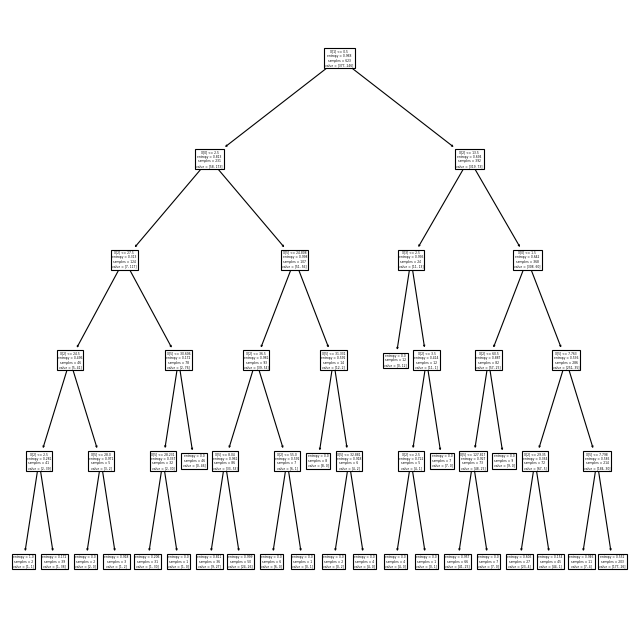

In [51]:
plt.figure(figsize=(10,10),dpi=80)
tree.plot_tree(sk_tree)
plt.show()